In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import imp
import os, glob,sys,pprint
import numpy as np
import matplotlib.pyplot as plt

import synphot
from astropy.utils.data import get_pkg_data_filename
from astropy.io import ascii,fits
import pandas as pd


from pfsspecsim import pfsetc
from pfsspecsim import pfsspec


# Please specify a place where the codes are located 
pfs_calibstars_dir = '/Users/ishigakimiho/PFS/Github/pfs_calibstars'
sys.path.append(pfs_calibstars_dir)
import pfs_calibstars as cs




## Signal-to-noise ratios for the Mohammad's grid

##### starting to run ETC ... (it takes a few min.) #####
##### finished (elapsed_time: 62.5[sec]) #####


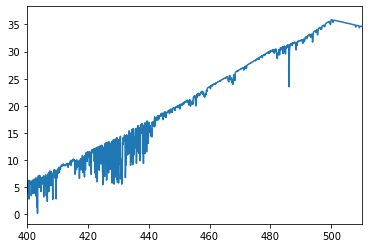

In [5]:
path = "/Users/ishigakimiho/PFS/Github/pfs_calibstars/speclib/Mohammad_grid/synthetic_grid/" 
file = "4000g+1.00z-3.00_4000-5000_xit2.0c0.00.spec"
outpath = "/Users/ishigakimiho/PFS/Github/pfs_calibstars/outputs/Mohammad_grid/"

w, nf, f = np.loadtxt(path + file, usecols = (0, 1, 2), unpack = True)

# Convirt to AB mag
band = "sdss_g"
mag = 20.
w_nm, mag = cs.flux2ABmag(w/10., f, band, mag)

 
# Save magnitudes to a file 
aa = np.array([w_nm, mag])
magfilename = outpath + file[:-5] + ".mag"
np.savetxt(magfilename,aa.T,fmt='%.3f %.3f')


#plt.plot(w_nm, mag)
#plt.show()


exptime = 900.
nexp = 2
MP = 0.0 # dark night
MTangle = 0.0
field_angle = 0.0 # field center
outnoisename = outpath + file[:-5] + ".noise"
outsncname = outpath + file[:-5] + ".snc"
mr_mode = "N"
TP = 1.0

etc = pfsetc.Etc()
etc.set_param('EXP_TIME',exptime)
etc.set_param('EXP_NUM', nexp)
etc.set_param('MAG_FILE',magfilename)
etc.set_param('REFF',0.0)  # should be 0 for a point source
etc.set_param('MOON_PHASE',MP)
etc.set_param('MOON_TARGET_ANG',MTangle)
etc.set_param('FIELD_ANG',field_angle)
etc.set_param('OUTFILE_NOISE',outnoisename)
etc.set_param('OUTFILE_SNC',outsncname)
etc.set_param('OUTFILE_SNL','-')
etc.set_param('OUTFILE_OII','-')
etc.set_param('MR_MODE',mr_mode)
etc.set_param('degrade',TP)

etc.run()


w, snc = np.loadtxt(outsncname, usecols = (2, 3), unpack = True)
plt.plot(w, snc)
plt.xlim(400., 510.)
plt.show()
    

# Nexp = 4 => S/N = 37 @ 500nm 
# Nexp = 8 => S/N = 53 @ 500nm

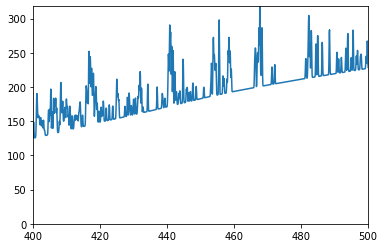

In [15]:
w, noise = np.loadtxt(outnoisename, usecols = (2, 3), unpack = True)
plt.plot(w, noise)
plt.xlim(400., 500.)
plt.ylim(0.0, np.max(noise[w<500.]))
plt.show()
    
# Nexp = 4 => noise ~ 200 @ 500nm


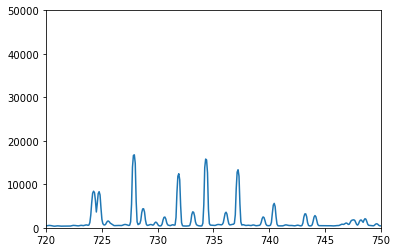

In [20]:
files = ["4000g+1.00z-3.00_4000-5000_xit2.0c0.00.noise"]

fig, ax = plt.subplots(1, 1)
for file in files:
    w, noise = np.loadtxt(outpath + file, usecols = (2, 3), unpack = True)
    ax.plot(w, noise)
ax.set_xlim(720., 750.)
ax.set_ylim(0.0, 50000)
plt.show()

    

## Simulated spectra for the Mohammad's grid

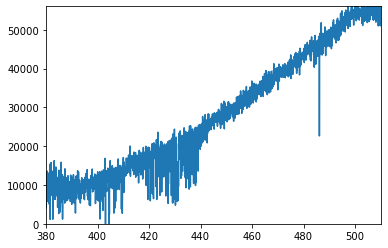

In [6]:
# Use inputs and outputs from etc.run()

sim = pfsspec.Pfsspec()
sim.set_param('outDir', outpath)
sim.set_param('etcFile', outsncname)
sim.set_param('MAG_FILE', magfilename)
sim.set_param('EXP_NUM',nexp)
sim.set_param('asciiTable', file[:-5] + ".sim")
sim.set_param('nrealize',1)
sim.make_sim_spec()

w, f = np.loadtxt(outpath + file[:-5] + ".sim.dat", usecols = (0, 1), unpack = True)
plt.plot(w, f)
plt.xlim(380., 510.)
plt.ylim(0.0, np.max(f[w < 500.]))
plt.show()



